In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hyperopt import hp

# numpy의 polyfit과 poly1d의 사용법
p = np.polyfit(x, y, n) : 주어진 x,y값을 만족하는 n차 함수의 coefficnent(p)를 리턴
f1 = np.poly1d(p) : 주어진 함수의 coefficinet를 가지고 1원 n차 함수를 만든다.

[2.98482669 5.04257828]


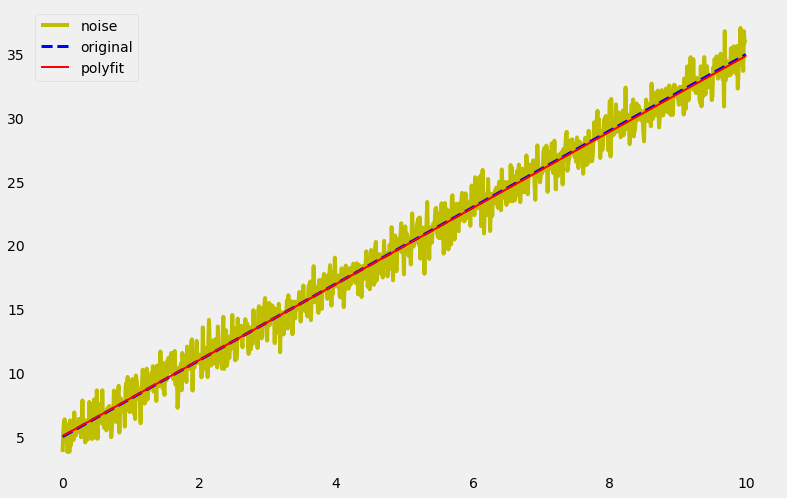

[ 1.06993768 -2.43763073  2.03926238]


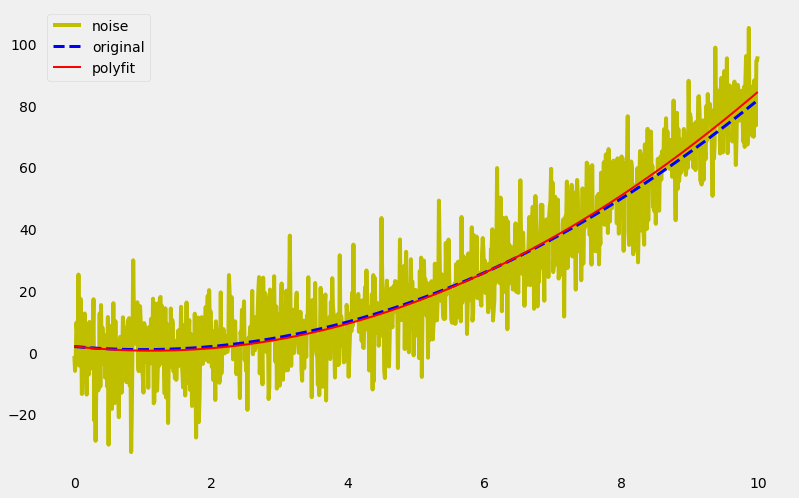

In [5]:
# 노이즈를 가지고 있는 y = 3 * x + 5함수를 만든다.
t = np.arange(0, 10, 0.01)
y = 3*t + 5
y_noise = y + np.random.randn(len(y))

# t,y값을 가지고 1차함수의 파리미터를 예측한다.
fp1 = np.polyfit(t, y_noise, 1)
print(fp1)
# poly1d : A one-dimensional polynomial class. 파라미터를 가지고 함수를 만든다.
f1 = np.poly1d(fp1)

plt.figure(figsize=(12,8))
plt.plot(t, y_noise, label='noise', color='y')
plt.plot(t, y, ls='dashed', lw=3, color='b', label='original')
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')
plt.grid()
plt.legend()
plt.show()

#2차를 함수를 만들고 예측하는 예제
y = np.square(t-1) + 1
y_noise = y + 10*np.random.randn(len(y))
fp1 = np.polyfit(t, y_noise, 2)
f1 = np.poly1d(fp1)
print(fp1)
plt.figure(figsize=(12,8))
plt.plot(t, y_noise, label='noise', color='y')
plt.plot(t, y, ls='dashed', lw=3, color='b', label='original')
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')
plt.grid()
plt.legend()
plt.show()

Minimum of -219.8012 occurs at 4.8779


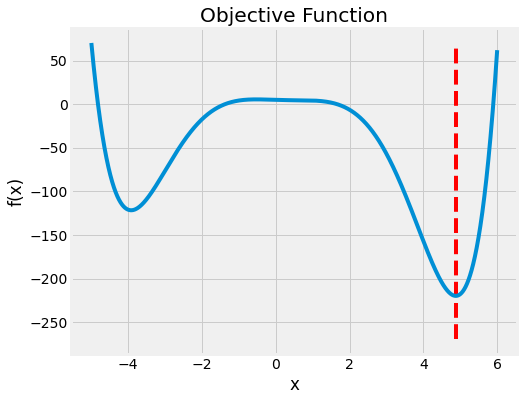

In [2]:
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))